# Learning Quantum Computing with Qiskit

Quantum computing is a rapidly advancing field with the potential to redefine computation and problem-solving as we know it. As technology advances, quantum computers show promise in tackling challenges that are currently out of reach for classical computers. By understanding the basics of quantum computing, enthusiasts and professionals alike can begin to appreciate its transformative capabilities and future applications.

Quantum computers, for example, can solve problems exponentially faster than traditional computers, allowing them to tackle issues that would take classical computers thousands of years in mere minutes. Additionally, quantum computing has significant implications for cybersecurity. While it threatens current encryption protocols, it also drives the development of post-quantum cryptography, which promises stronger data protection. Through this tutorial, we aim to provide users with an introduction to quantum concepts specifically the threats it poses to the current encription protocols. 

#### Learning Objectives
By the end of this tutorial, you will:
+ Understand the basics of quantum computing
+ Know how to use the Qiskit library
+ Be familiar with popular quantum algorithms
+ Learn tools to start quantum computing projects

# I. Introduction to Quantum Computing

In this section, we’ll provide an overview of foundational concepts of quantum computing concepts. This will be a theory-focused section, setting up a foundation of knowledge necessary for Part II, where users will engage in hands-on exercises with Qiskit. The main goal is to introduce key differences between classical and quantum computing, along with essential quantum concepts, in a beginner-friendly manner. After completing Part I, users should have a high-level understanding of how quantum computing works and feel prepared to explore the basics of coding in Qiskit. 

## Classical Computing vs. Quantum Computing

Quantum computing works in a different way than the classical computing that we're used to. A classical computer is what you are viewing this on right now, and includes things like laptops, PCs, smartphones, and tablets. Quantum computers are a lot more rare, and are typically kept in strictly monitored environments that prevent physical disturbance of the computer. Although classical computers are more popular, quantum computers have a much higher processing power. And even though they are both computers, the way they operate is fundamentally different. Below highlights the differences in how these computers work:  

### Classical Computers
* Store data in bits
* Operations are based on Boolean algebra
* Circuits are modeled from classical physics
* Bits can only be in two states: 0 or 1

### Quantum Computers
* Store data in qubits
* Operations are based on linear algebra
* Circuits are modeled from quantum mechanics
* There are an infinite amount of qubit states


## What is a Qubit?

A Qubit, also known as a quantum bit, is the basic unit of information in quantum computing.
A qubit is a two-state quantum system that can represent a 0, a 1, or any proportion of both. A two-state quantum system has two physically distinguishable features. These features are what encode 0 and 1. For example, the spin of an electron can be used as a qubit, with spin up and spin down representing 0 and 1 respectively. Overall, qubits are created by manipulating and measuring quantum particles, such as electrons, photons, or trapped ions. 

Additionally, qubits use quantum mechanical phenomena like superposition and entanglement to encode and process information.

1. **Superposition** is the principle that a quantum system can exist in multiple states simultaneously. For instance, in a classical scenario, a coin must be either heads or tails when observed. However, in quantum mechanics, a qubit can be in a state of "0" and "1" at the same time until it is measured. When the qubit is measured, it "collapses" into one of the two possible outcomes (either "0" or "1").

2. Entanglement is a quantum phenomenon where two or more particles become interconnected in such a way that the state of one particle directly affects the state of the other, no matter the distance between them. This connection creates a "shared" state across particles.

Furthermore, Qubits behave differently from bits, the basic unit of information in classical computing, because of the quantum properties they're based on. Quantum computing uses qubits to execute calculations instead of the electrical signals used in classical computing. 
  

## Major Concepts and Additional Terminology

#### Dirac (Bra-ket) Notation

[comment]: <> (Include multiple qubit kets)

To better understand qubits, we need a way to represent them. The most common way they are represented is with **Dirac Notation** also known as **Bra-ket** notation.

We can notate an arbitrary qubit as follows:

$$
\ket{\psi} = \alpha\ket{0} + \beta\ket{1}
$$

Note that $\ket{}$ is called a ket

Here, the qubit $\ket{\psi}$ is in superposition. Recall that this means that it's some proportion of both $\ket{0}$ and $\ket{1}$. Due to quantum mechanics, when we measure this qubit, it collapses and we observe it as either $\ket{0}$ or $\ket{1}$. It turns out, what we see depends on the superposition.

In particular, the probability that we find the qubit in $\ket{0}$ is $|\alpha|^2$ and the probability we find qubit in $\ket{1}$ is $|\beta|^2$.

Also note that since we find *either* $\ket{0}$ or $\ket{1}$, it must be true that $|\alpha|^2 + |\beta|^2 = 1$

These kets can also be represented as column vectors. In particular,

$$
\ket{0} = \begin{bmatrix}1 \\ 0 \end{bmatrix}
\newline
\ket{1} = \begin{bmatrix}0 \\ 1 \end{bmatrix}
$$

Therefore,
$\ket{\psi} = \begin{bmatrix}\alpha \\ \beta \end{bmatrix}$.

This proves useful when understanding quantum logic gates (explained in the next section).

#### **Additional Terminology**

**Probability Distributions**

In classical computing calculations yield definite answers (like 0s and 1s). However, quantum computing typically produces outcomes in terms of probability distributions. This means that the state of a quantum system is not fixed until it is measured.   

One example of this is presented through qubit superposition, as mentioned above, where a qubit can simultaneously represent both 0 and 1 until it is measured. Until this point, qubits are represented by the probability of it being measured as 0 or 1. When this idea is applied, for example in quantum circuits, results will reflect these probabilities over many runs, providing a meaningful distrbutoin of possible outcomes.   

Each possible basis state (for our purposes, $\ket{0}$ and $\ket{1}$) in a quantum system has a complex number called an amplitude, which when squared, gives the probability of observing that state upon measurement. Using the example of $\ket{\psi}$ from above, the amplitude for $\ket{0}$ is $\alpha$ and the amplitude for $\ket{1}$ is $\beta$. The probability distribution is derived from these amplitudes and provides a snapshot of what we will likely find when the qubit is measured. 

Understanding probability distribution is fundamental to interpreting quantum computing results.  Thankfully, Qiskit includes tools to visualize these distributions which we will go over later in this tutorial. 


**Interference** 

Interference is the manner in which different paths of quantum information overlap and either reinforce or cancel each other. This interference is key to algorithms because it is used to affect the probability amplitides of certain outcomes. Interference is the foundation of algorithms like Grover’s Search where the probabilities of correct values are amplified to appear more frequently. At the same time, Grover’s Srrach also uses destructive interference to diminish the probabilities of other outcomes. These ideas are key to understanding why quantum computers can perform more efficiently than classical computers. 

**Decoherence** 

Decoherence is the process where a quantum system loses it quantum properties and reverts back to a classical system. Environmental factors (such as electromagnetic waves interacting with qubits) that disrupt the quantum system are responsible for this process. This disruption can cause quibits in the system to lose their key properties, such as superposition and entanglement. Ultimately, this leads to errors during computation and is one of the main challenges faced in the proces of building reliable quantum computers. 




## Quantum Logic Gates
[comment]: <> (Need to include examples)
At the circuit level, classical computers are a bunch of logic gates. Similarly, the circuits for quantum computers make use of *quantum logic gates*. Mathematically, these logic gates are matrices. When a qubit goes through a gate in a quantum circuit, the qubit (as a vector) gets left-multiplied by the gates (as a matrix). Here, we will go over the some of the major gates and provide some examples for clarity.

### X Gate
$$ 
X = 
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
$$ 

So,

$$
X\ket{0} = \ket{1}
\newline
X\ket{1} = \ket{0}
\newline
X\ket{\psi} = \alpha\ket{1} + \beta\ket{0}
$$

We can think of the $X$-gate as a NOT gate.

### Z Gate
$$ 
Z = 
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
$$ 

So,

$$
Z\ket{0} = \ket{0}
\newline
Z\ket{1} = -\ket{1}
\newline
Z\ket{\psi} = \alpha\ket{0} - \beta\ket{1}
$$

The $Z$-gate performs a *phase shift* within our qubit, which is necessary to fully manipulate it. Here, the *phase* is the negative assign that got attached to $\ket{1}$

### Hadamard Gate
$$
H =
\begin{bmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}}
\end{bmatrix}
$$

So,

$$
H\ket{0} = \frac{1}{\sqrt{2}}\ket{0} + \frac{1}{\sqrt{2}}\ket{1}
\newline
H\ket{1} = \frac{1}{\sqrt{2}}\ket{0} - \frac{1}{\sqrt{2}}\ket{1}
\newline
H\ket{\psi} = \frac{\alpha}{\sqrt{2}}\ket{0} - \frac{\beta}{\sqrt{2}}\ket{1}
$$

The Hadamard gate puts a qubit into an equal superposition. This means that when we measure the output, there will be an equal chance to get any one of the qubit's basis states (i.e. $\ket{0}$ and $\ket{1}$). Note that for $\ket{1}$, it adds a phase.

### CNOT Gate
Unlike the past three gates, the CNOT gates act on two qubits at a time.
$$
CNOT =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{bmatrix}
$$

So,

$$
CNOT\ket{00} = \ket{00}
\newline
CNOT\ket{01} = \ket{01}
\newline
CNOT\ket{10} = \ket{11}
\newline
CNOT\ket{00} = \ket{10}
$$

The CNOT gate is a *controlled* NOT gate. It applies an X-gate on the target qubit depending on the value of the control qubit. Here, the control qubit is the left qubit, and the target qubit is the right qubit. This gate is used to entangle qubits together.


# Part II. Qiskit Overview

Now that we've covered the basics of quantum computing, we can start coding! To do this we will be using IBM's Qiskit library. Qiskit is a library that allows you to run your own quantum algorithms on IBM's quantum computers. We will set up a quantum channel that connects us to IBM's quantum hardware, create code using quantum circuits, and run our code through the quantum channel.

## Setting up Qiskit

### Installing Qiskit
Before we jump into using Qiskit, we have to set up a coding environment. 
First, download the `Miniconda` installer at this link: https://docs.anaconda.com/miniconda/miniconda-install/. Then, install Qiskit and Qiskit Runtime with pip.

In [5]:
pip install qiskit
pip install qiskit_ibm_runtime

### Creating an IBM Account

IBM requires you to make an account to access their quantum hardware. They have free and paid plans depending on how many jobs you'll be running. For now, we'll just sign up for the free plan, which provides you with 10 minutes of free runtime every month. 

Task: Make an account with the "Open Plan" from this link: https://www.ibm.com/quantum/pricing

Then, copy your API token for later use. (Don't share this with anyone!)

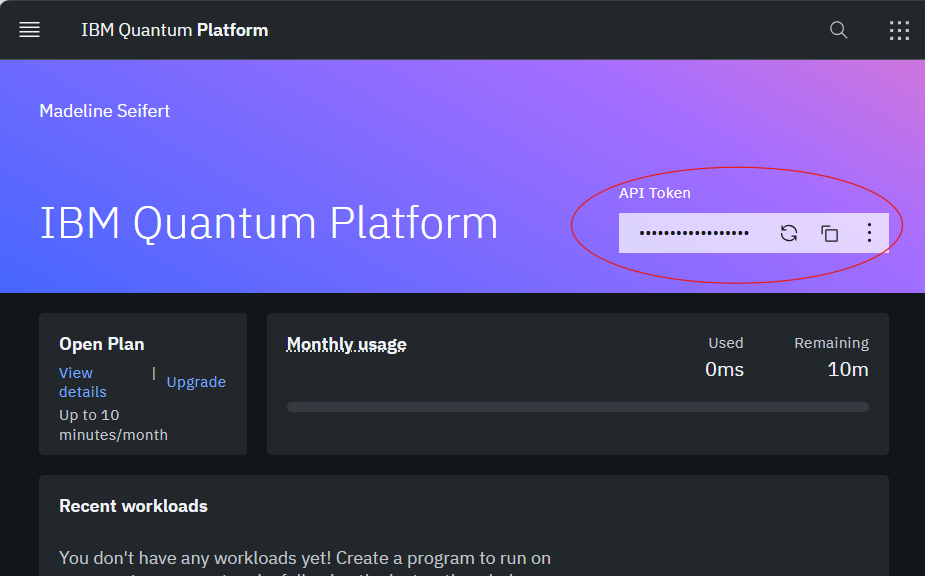

### Setting up a Quantum Channel

To run our code on IBM's quantum computers, we have to set up a channel to connect us to their computers. 

Task: Paste the API token from your account into the text below that says `YOUR_TOKEN_HERE`. Then, run the code cell to set up the quantum channel.

In [6]:
import qiskit
from qiskit_ibm_runtime import QiskitRuntimeService

#Setup the quantum channel 
service = QiskitRuntimeService(channel="ibm_quantum",
                              token = "YOUR_TOKEN_HERE")

## Using Qiskit

In this section, we will be exploring different gates and cicuit implementation using Qiskit's circuit library. We will also plot probaility distributions and draw these circuits using Matplotlib. 

### Hadamard Gate 

First we will start off by importing key libraries. We will be using: plot_histogram, Sampler, and circuit_drawer.

In [7]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler 

Then, we wil create a quantum circuit wc with one qubit and one classical bit. The qubit will be in superpostiion after the Hadamerd date is applied, and the classical bit will store the measurement outcome.

In [8]:
qc = QuantumCircuit(1, 1)

Now, we will apply a Hadamard gate to qubit 0. This gate will place the qubit in an equal superpositon state, giving it a 50% probability of being measured as a |0> and a 50% probablity of being measured as |1>.

In [9]:
qc.h(0) 

We can then measure the state of qubit 0 and stores the results in the classical bit 0. 
After this measuremnet, we are able to observe a |0> or |1>, each with equal probability 
due to the Hadamard gate.

In [10]:
qc.measure(0, 0)

We will create a sampler object to simulate the quantum circuit's measurement outcomes. The sampler will then run the qc curciot, returning the job object. We will then retreive the results of the job and the probability distribtuin of the outcomes for each possible measurment.

In [11]:
sampler = Sampler() 
job = sampler.run([qc]) 
result = job.result()
counts = result.quasi_dists[0]

/var/folders/j2/k3ztkljn6vx8_ksl1zjp_gxc0000gn/T/ipykernel_36749/647082545.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Finally, we can plot both the probability distributions and draw the gate using plot_hsitogram and .draw().

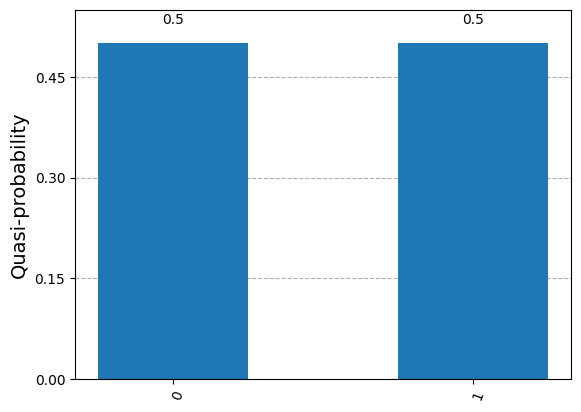

In [12]:
plot_histogram(counts)

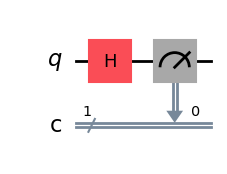

In [13]:
qc.draw(output='mpl')

Here is what our code snipet for a Hadamard gate should look once put together.

/var/folders/j2/k3ztkljn6vx8_ksl1zjp_gxc0000gn/T/ipykernel_36749/2720700529.py:11: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


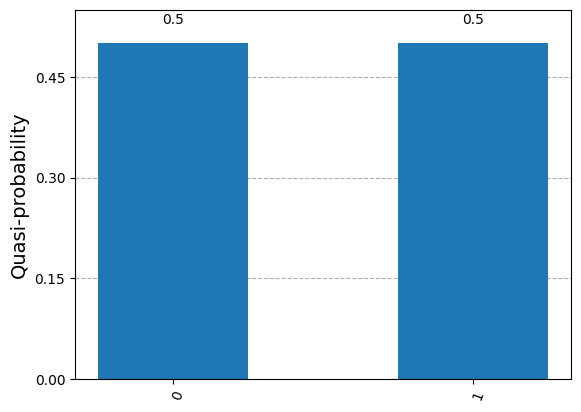

In [14]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler 

qc = QuantumCircuit(1, 1)

qc.h(0)

qc.measure(0, 0)

sampler = Sampler() 
job = sampler.run([qc]) 
result = job.result()
counts = result.quasi_dists[0]

plot_histogram(counts) 



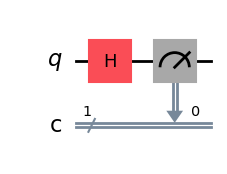

In [15]:
qc.draw(output='mpl')

### X (NOT) Gate 

In order to create an X Gate, we will do the same setup as with the Hadmard Gate. We will start off by importing key libraries and creating a circuit with a qubit and a classical bit.

In [16]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler 

qc = QuantumCircuit(1, 1)

We can then apply the X gate onto the qubit, flipping the qubit's state. If the qubit was initially in the |0⟩ state (which it is by default), this gate will flip it to |1⟩.  Essentially, this is the quantum version of a NOT operation. After this gate, the qubit is in the |1⟩ state with certainty, meaning if we measure the qubit, we expect to see 1 100% of the time.

In [17]:
qc.x(0)

From there, we can meausre the bits and execute the circuit like we did above.

/var/folders/j2/k3ztkljn6vx8_ksl1zjp_gxc0000gn/T/ipykernel_36749/4047959925.py:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


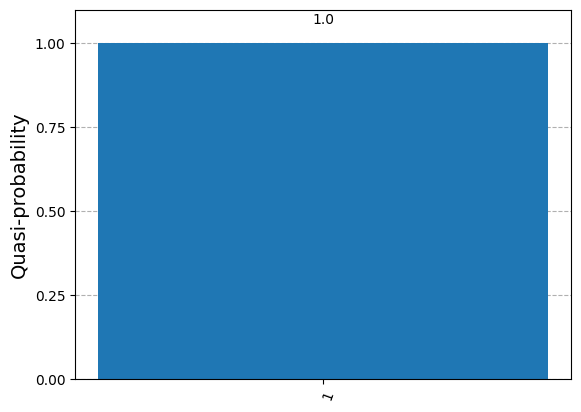

In [18]:
qc.measure(0, 0) 

sampler = Sampler()
job = sampler.run([qc])
result = job.result()
counts = result.quasi_dists[0] 

plot_histogram(counts)

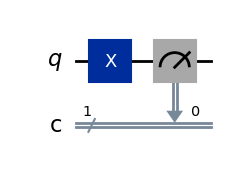

In [19]:
qc.draw(output='mpl')

### Z Gate

We can follow the same structure as the gates above to create a z gate. The Z gate flips the phase of the qubit’s state but does not change the probability distribution for measurement in the computational basis. This means it doesn’t affect whether a measurement will yield 0 or 1, but it does flip the phase of the |1⟩ component.

If the qubit is initially in |0⟩, applying a Z gate leaves it unchanged in measurement outcomes (stays |0⟩). However, if the qubit is in a superposition (like 50% |0⟩ and 50% |1⟩), applying Z will change the relative phase of these states, which can be useful in more complex circuits.

/var/folders/j2/k3ztkljn6vx8_ksl1zjp_gxc0000gn/T/ipykernel_36749/1164211029.py:11: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


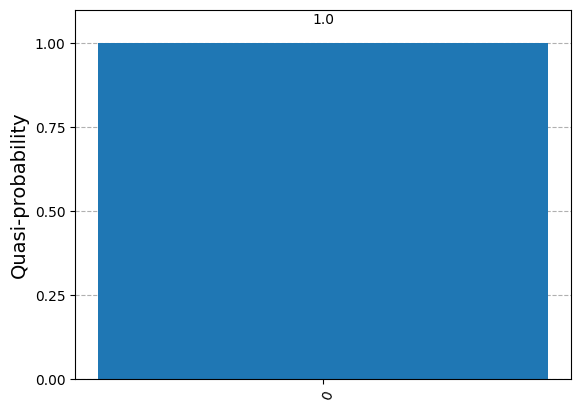

In [20]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler 

qc = QuantumCircuit(1, 1)

qc.z(0) 

qc.measure(0, 0) 

sampler = Sampler()
job = sampler.run([qc])
result = job.result() 

counts = result.quasi_dists[0] 

plot_histogram(counts)

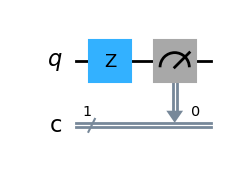

In [21]:
qc.draw(output='mpl')

### Entangled Bell State

An entangled Bell state is a key concept in quantum mechanics that demonstrates the principle of entanglement, where the states of two or more qubits become interconnected such that the state of one qubit cannot be described independently of the other state(s). Bell states are a specific type of entangled state involving two qubits.


To create an entabgled bell state, a quantum circuit qc is created with 2 qubits and 2 classical bits. The qubits will be used to create an entangled state, and the classical bits will store the measurement outcomes of these qubits.

In [30]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler  

qc = QuantumCircuit(2, 2)

A Hadamard gate is applied to qubit 0. This puts qubit 0 in a superposition state:
$$|0\rangle \rightarrow \frac{|0\rangle + |1\rangle}{\sqrt{2}}$$
This prepares the first qubit for entanglement with the second qubit.

A CNOT gate is set up with qubit 0 as the control and qubit 1 as the target. This gate entangles the two qubits, creating a Bell state:
$$\frac{|00\rangle + |11\rangle}{\sqrt{2}}$$
The CNOT gate flips the state of qubit 1 if qubit 0 is in the |1⟩ state. Since qubit 0 is in a superposition, this creates entanglement.

In [31]:
qc.h(0)
qc.cx(0, 1)

The qubits are then measured and their information is stored in the corresponding classical bit. The Bell state created here entangles the two qubits such that measuring one qubit will instantly determine the state of the other. If one qubit is measured as 0, the other will also be 0; similarly, if one is measured as 1, the other will also be 1. In this case, we expect correlated outcomes: either 00 or 11 (binary 11 is represented as 3 in the plot) with equal probability. The outcomes 01 and 10 should have zero probability, as they do not occur in this entangled state. This can be seen as we execute and plot the circuit as shown below.

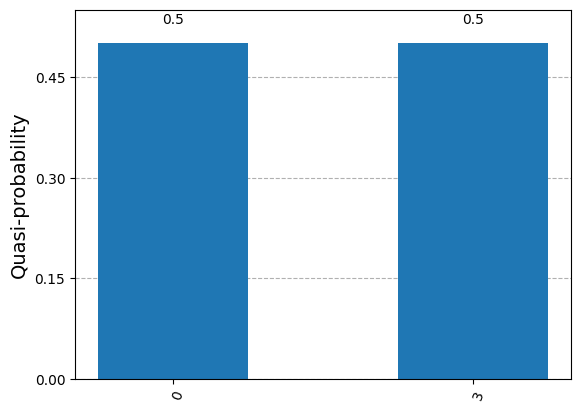

In [32]:
qc.measure(0, 0)
qc.measure(1, 1)

job = sampler.run([qc])
result = job.result()
counts = result.quasi_dists[0]

plot_histogram(counts) 

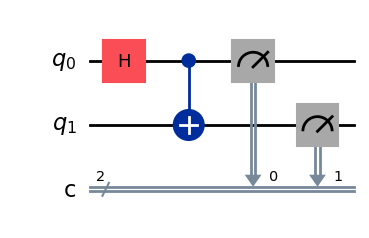

In [33]:
qc.draw(output='mpl')

## Quantum Algorithms  

To ilustrate this workflow. We will use some popular quantum algorithms to solve a problem

### Grover’s Search Algorithm

Delete this when the code is done.

**Tasks:** 
+ Run Grover’s Search Algorithm using Qiskit
+ Task: Use Grover’s Search Algorithm to decrypt an encrypted password

In [26]:
import math
import random

def oracle(x, target):
    """Oracle function that checks if x is the target."""
    return x == target

def diffuser(amplitudes):
    """Diffusion operator."""
    n = len(amplitudes)
    mean = sum(amplitudes) / n
    return [2 * mean - amplitude for amplitude in amplitudes]

def grover_search(n, target):
    """Grover's search algorithm."""
    amplitudes = [1 / math.sqrt(n) for _ in range(n)]
    iterations = int(math.pi / 4 * math.sqrt(n))

    for _ in range(iterations):
        for i in range(n):
            if oracle(i, target):
                amplitudes[i] *= -1
        amplitudes = diffuser(amplitudes)

    return amplitudes.index(max(amplitudes))

# Example usage
n = 8
target = 5
result = grover_search(n, target)
print("Target:", target)
print("Result:", result)


Target: 5
Result: 5


In [27]:
# Create a password and encrypt it

In [28]:
# Decrypt the password 

In [29]:
# Apply Grovers Algothim 

### Shor's Algorithm

Shor's algorithm is used to factor large numbers, which has many applications. Here, we will use Shor's algorithm to 

# References

1. https://www.ibm.com/topics/qubit
2. https://github.com/lynkos/grovers-algorithm/blob/main/src/grovers_algorithm.ipynb